# LinearRegression을 이용한 보스턴 주택 가격 회귀 구현

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

## Features

- CRIM : 지역별 범죄 발생률
- ZN : 25,000평 방피트를 초과하는 거주 지역의 비율
- INDUS : 비상업 지역 넓이 비율
- CHAS : 찰스강에 대한 더미 변수(강의 경계에 위치한 경우1, 아니면 0)
- NOX : 일산화질소 농도
- RM : 거주할 수 있는 방 개수
- AGE : 1940년대 이전에 건축된 소유 주택의 비율
- DIS : 5개 주요 고용센터 까지 가중 거리
- RAD : 고속도로 접근 용이도
- TAX : 10,000달러당 재산세율
- PTRATIO : 지역의 교사와 학생 수 비율
- B : 지역 흑인 거주 비율
- LSTAT : 하위 계층의 비율
- MEDV : 본인 소유 주택 가격(중앙값)

In [16]:
bostondf = pd.DataFrame(boston.data, columns= boston.feature_names)
bostondf['PRICE'] = boston.target
bostondf.head()
print(bostondf.shape)

(506, 14)


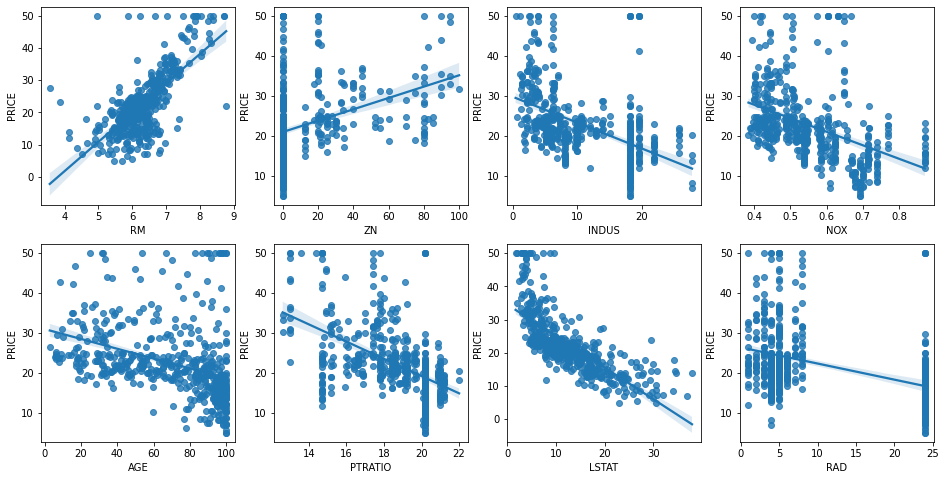

In [19]:
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostondf , ax=axs[row][col])
fig1 = plt.gcf()
fig1.savefig('p322_boston.tif', format='tif', dpi=300, bbox_inches='tight')

## 학습, 테스트 데이터 분리 후 학습/예측/평가

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostondf['PRICE']
X_features = bostondf.drop('PRICE',axis=1, inplace=False)
X_train,X_test,y_train,y_test = train_test_split(X_features, y_target, test_size=0.3,random_state=156)

lr = LinearRegression()
lr.fit(X_train,y_train)

y_preds =lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print('MSE:{0:.4f}, RMSE:{1:.4f}'.format(mse,rmse))
print('Vriance score: {0:.4f}'.format(r2_score(y_test,y_preds)))

MSE:17.2969, RMSE:4.1590
Vriance score: 0.7572


In [28]:
print('절편값: ',lr.intercept_)
print('회귀계수값: ',np.round(lr.coef_,1))

절편값:  40.995595172164435
회귀계수값:  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [29]:
# 회귀계수를 큰값 순으로 정렬

coeff = pd.Series(data = np.round(lr.coef_,1), index=X_features.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

## cross_val_score()를 통해 교차검증으로 MSE, RMSE 측정

In [31]:
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(lr,X_features,y_target, scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5folds 의 개별 Negative MSE scores: ',np.round(neg_mse_scores,2))
print('5folds 의 개별 RMSE scores: ',np.round(rmse_scores,2))
print('5folds 의 평균 RMSE scores: {0:.3f}'.format(avg_rmse))

5folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5folds 의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
5folds 의 평균 RMSE scores: 5.829
